## Bagging
Bagging, also known as bootstrap aggregating, is an ensemble learning technique that combines the predictions of multiple machine learning models to produce a more accurate prediction. It works by randomly sampling the training data with replacement to create multiple subsets of the data. Each model is trained on a different subset of the data. The predictions of the models are then averaged to produce a final prediction.

### Objective:

Imagine you have to make an important decision, like predicting whether it will rain tomorrow. Instead of relying on one weather forecast, Bagging uses multiple forecasts from different sources, combines them, and makes a more reliable prediction.

### Explanation:

1. Bootstrap Sampling: Bagging starts by creating multiple random subsets of your data. It's like taking different small samples (with replacement) from your big dataset. Each sample is like a mini-version of your data.

2. Multiple Models: Then, Bagging trains multiple models (like decision trees or others) on these mini-samples. Each model is like a different expert making predictions based on a slightly different view of the data.

3. Voting or Averaging: When you want to make a prediction, Bagging asks all these models (experts) to provide their opinions. For example, if you're predicting the weather, each model might say "rain" or "no rain." Bagging combines these opinions through voting (for classification tasks) or averaging (for regression tasks) to give you the final prediction.

### Advantages of bagging:

1. Improved accuracy: Bagging can improve the accuracy of machine learning models by reducing variance. Variance is a measure of how much the predictions of a model change when the training data is changed. Bagging helps to reduce variance by averaging the predictions of multiple models, which are trained on different subsets of the data.

2. Reduced overfitting: Bagging can also help to reduce overfitting. Overfitting is a problem that occurs when a model learns the training data too well and does not generalize well to new data. Bagging helps to reduce overfitting by averaging the predictions of multiple models, which are trained on different subsets of the data.

3. Parallel processing: Bagging can be parallelized, which means that the models can be trained simultaneously. This can significantly improve the training speed of large datasets.

### Disadvantages
1. Computational cost: Bagging can be computationally expensive, especially for large datasets. This is because bagging needs to train multiple models.

2. Interpretability: Bagging can make machine learning models less interpretable. This is because it is difficult to understand how the predictions of the models are combined to produce a final prediction.

Imagine that you are trying to predict the weather for tomorrow. You could ask a group of experts for their predictions. Each expert would likely use their own knowledge and experience to make a prediction. However, some experts may be more accurate than others. Additionally, some experts may be more biased towards certain types of weather.

Bagging would work by combining the predictions of all the experts. This would help to reduce the variance of the predictions and produce a more accurate overall prediction. Additionally, the bagging model would be less biased than any individual expert.

Bagging is a powerful technique that can be used to improve the accuracy of a wide variety of machine learning models. It is a good choice for many beginners because it is relatively easy to implement and use.



# Difference Between Bagging and Random Forest

Bagging and Random Forest are both ensemble techniques in machine learning that aim to improve the accuracy and robustness of models by combining multiple weaker models. However, there are key differences between the two:

1. Method of Combining Models: 
<br>

    1. Bagging (Bootstrap Aggregating): Bagging creates multiple subsets (samples) of the training data using random sampling with replacement. Each subset is used to train a separate base model, typically a decision tree. The final prediction is made by aggregating the predictions of these base models, often through majority voting (for classification) or averaging (for regression).
    <br>

    2. Random Forest: Random Forest is a specific ensemble method that builds on the idea of Bagging. It also creates multiple subsets of the training data and trains individual decision trees on these subsets. However, there's a key difference in how Random Forest constructs these trees. It introduces an additional element of randomness by selecting a random subset of features (variables) to consider at each node of the decision tree. This randomness helps decorrelate the trees and reduce overfitting.
<br>

2. Feature Selection:
<br>

    1. Bagging: Bagging typically uses all available features when training each base model. It doesn't impose any constraints on feature selection during the construction of individual trees.
    
    <br>
    2. Random Forest: In Random Forest, a random subset of features is considered at each node of every tree. This feature randomness makes Random Forest more robust and helps it generalize better, especially when dealing with datasets with many features.
    <br>

3. Use of Decorrelation:
<br>

    1. Bagging: While Bagging aims to reduce overfitting and improve prediction accuracy by combining multiple models, it does not specifically address the problem of decorrelating the base models. In some cases, the base models in Bagging can still be highly correlated.
    <br>
    2.Random Forest: Random Forest is designed to address the issue of correlation among base models. By using feature randomness and averaging the predictions of these decorrelated trees, Random Forest achieves a higher level of robustness and generalization performance.
    
    <br>

In summary, Bagging is a general ensemble technique that involves creating multiple subsets of the training data and training individual base models. Random Forest is a specific type of Bagging that adds an extra layer of randomness by selecting random subsets of features for each tree. This randomness makes Random Forest more effective in reducing overfitting and improving model accuracy, especially in scenarios with high-dimensional data or complex relationships between features.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [5]:
df= pd.DataFrame(X, columns = (["col1", "col2", "col3", "col4", "col5"]))
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.082143,-1.964953,-0.091239,0.027700,2.083378,1
1,2.116773,1.290678,1.688480,-0.191962,-0.322890,1
2,2.052741,0.525236,-2.320677,-2.403963,-1.147770,0
3,0.640558,-1.369550,1.090761,1.412852,0.814912,1
4,2.484659,0.335164,0.756984,1.043712,2.313405,1


# Bagging

bag = BaggingClassifier(max_features = 2) # column sampling is set to 2 here

In [7]:
bag.fit(df.iloc[:,0:5], df.iloc[:,-1])

BaggingClassifier(max_features=2)

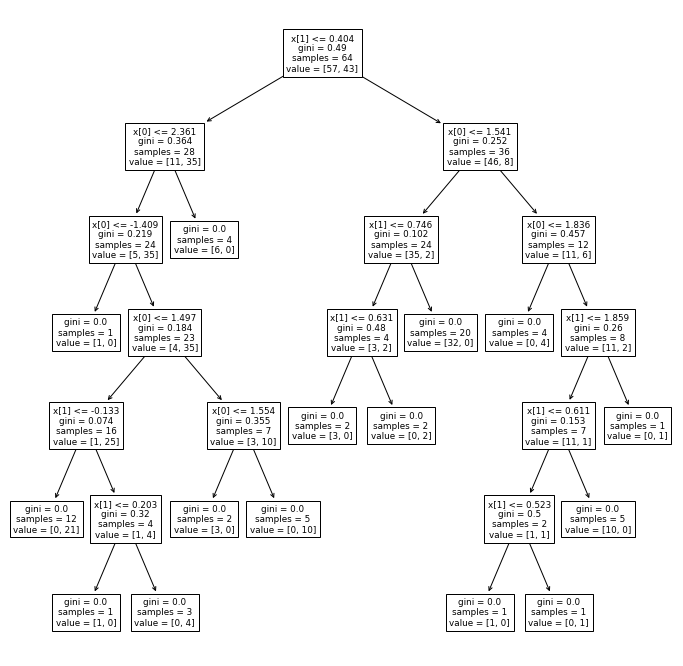

In [8]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()
# You can splitting is happening only with 2 columns which was selected for the first node.
# Before forming the tree it is already finalized that which 2 columns will be used to form the tree
# Tree level sampling

# Random Forest

In [9]:
rf = RandomForestClassifier(max_features=2) # column sampling is set here to 2

In [11]:
rf.fit(df.iloc[:,:5], df.iloc[:,-1])

RandomForestClassifier(max_features=2)

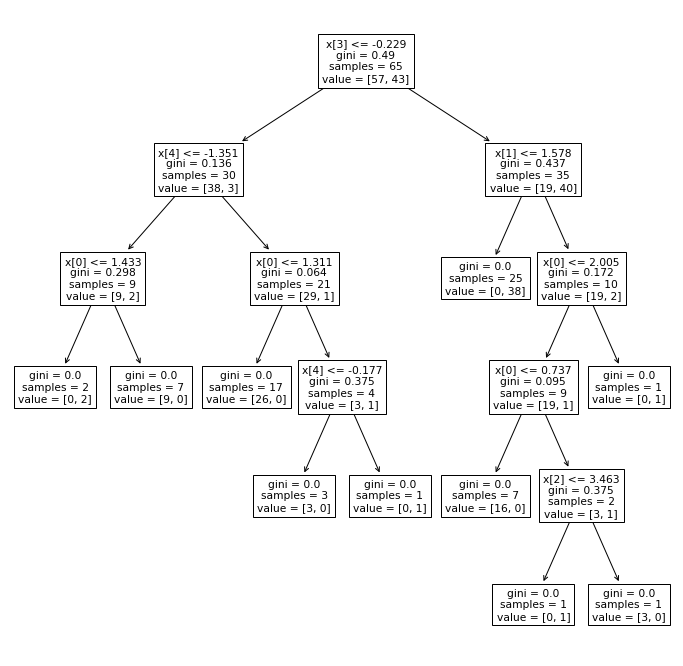

In [13]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[0])
plt.show()
# You can see in each node the splitting is happening and for each node the the split with column is different.
# here evertime before making a node randomly 2 cols are selected
# NOde level sampling
# Due to this the randomeness in random forest is greater in comparison to the bagging method due to which random forest ensomble method performs better